# Homework 06
## Brown University
## DATA 1010
## Fall 2020

In [1]:
using Plots, Distributions

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


## Problem 1

Label each of the following four estimators as either (i) biased and
  consistent, (ii) biased and inconsistent, (iii) unbiased and
  consistent, or (iv) unbiased and inconsistent.  The matching will be
  one-to-one.

(a) $X_1, X_2, \ldots$ are i.i.d. Bernoulli random variables with
    unknown $p$ and estimator 
    $$\widehat{p} = \frac{1}{n}\sum^n_{i=1}X_i$$

(b) $X_1, X_2, \ldots$ are i.i.d. $\mathcal{N}(\mu,\sigma^2)$, with
    unknown $\mu$ and $\sigma^2$ and estimator 
    $$\widehat{\sigma}^2 = \frac{\displaystyle{\sum^n_{i=1}(X_i-\bar{X})^2}}{n}$$

(c) $X_1, X_2, \ldots$ are i.i.d. uniform random variables on an
    unknown bounded interval. For $n\geq 100$ we estimate the
    mean using
    $$\widehat{\mu} = \frac{\displaystyle{\sum^{100}_{i=1}X_i}}{100}$$
    
(d) $X_1, X_2, \ldots$ are i.i.d. $\mathcal{N}(\mu,\sigma^2)$, with
    unknown $\mu$ and $\sigma^2$. For $n\geq 100$ we estimate the
    standard deviation using
    $$\widehat{\sigma} = \sqrt{\frac{\displaystyle{\sum^{100}_{i=1}(X_i-\overline{X})^2}}{99}}$$

(solution a) (iii) $$E(\hat{p}) = \frac{np}{p}$$, so it is unbiased. It is consistent because when $n→∞$, $\widehat{p}→p$, and the bias and variance converges to 0.

(solution b) (i) The estimator is biased because ${\displaystyle {\begin{aligned}\operatorname {E} [\widehat{\sigma}^2]&=\operatorname {E} \left[{\frac {1}{n}}\sum _{i=1}^{n}{\big (}X_{i}-{\overline {X}}{\big )}^{2}\right]=\operatorname {E} {\bigg [}{\frac {1}{n}}\sum _{i=1}^{n}{\bigg (}(X_{i}-\mu )-({\overline {X}}-\mu ){\bigg )}^{2}{\bigg ]}=\sigma ^{2}-\operatorname {E} \left[({\overline {X}}-\mu )^{2}\right] = \frac{n-1}{n}\sigma^2<\sigma^{2}.\end{aligned}}}$ However, when $n→∞$, $\widehat{\sigma}^2→\sigma^2$, and the bias and variance converges to 0, so that it is consistent.

(solution c) (iv) The estimator is unbiased because ${\begin{aligned}E\left(\widehat{\mu}\right) = \frac{100\mu}{100}=\mu\end{aligned}}$. However, it is inconsistent, because it doesn't depend on $n$, and the variance would be always positive and cannot converge to 0 as $n→∞$.

(solution d) (ii) It is inconsistent because the variance and bias will not converge to 0 as n grows. It is biased because the estimator for the $\sigma^2$ is unbiased does not mean its square root for $\sigma$ is unbiased. $$E(\sqrt{\sigma^2}) \neq \sqrt{E(\sigma^2)}$$

## Problem 2

There's nothing particularly special about the normal approximation when it comes to producing confidence intervals. We can use any relevant results from mathematical probability to come up with a confidence interval. In this problem, we're going to explore several such options for the same example of $n$ Bernoulli($p$) random variables. 

(a) **Hoeffding's inequality** says that if $Y_1, Y_2, \ldots$ are independent random variables with the property that $\mathbb{E}[Y_i] = 0$ and $a_i \leq Y_i \leq b_i$ for all $i$, then for all $\epsilon>0$ and $t > 0$, we have $$\mathbb{P}\left(Y_1 + Y_2 + \cdots + Y_n \geq \epsilon \right) \leq e^{-t \epsilon} \prod_{i=1}^n e^{t^2(b_i-a_i)^2/8}.$$
    
Use Hoeffding's inequality to show that if $X_1, X_2, X_3, \ldots$ is a sequence of independent $\operatorname{Bernoulli}(p)$ random variables, then for all $\alpha > 0$, the interval $\left(\overline{X}_n - \sqrt{\frac{1}{2n}\log(2/\alpha)},\overline{X}_n + \sqrt{\frac{1}{2n}\log(2/\alpha)}\right)$ is a confidence interval for $p$ with confidence level $1 - \alpha$. Explain what happens to the width of this confidence interval if $n$ gets large, and also what happens to the width if $\alpha$ is made very small.
    
(b) As above, consider $n$ independent $\operatorname{Bernoulli}(p)$'s. Find the normal-approximation confidence interval for $p$

(c) As above, consider $n$ independent $\operatorname{Bernoulli}(p)$'s. Find the Chebyshev confidence interval for $p$. (Chebyshev's inequality says that the probability of any random variable deviating from its mean by more than $k$ standard deviations is no more than $1/k^2$.)

(d) Find the numerical values of the half-widths for each of the above confidence intervals when $p = \frac{1}{2}$, $n = 1000$, and $\alpha = 0.05$ (approximating $\overline{X}$ as $p$). 

(solution a) Since for all $\epsilon$, the Hoeffding's inequality satisfies, we can assign $\epsilon$ to the minimal value. Set
$$g(s) = -st + \frac{1}{8}s^2 \sum_{i=1}^n (b_i-a_i)^2$$
solve g'(s) = 0, we have $$s = \frac{4t}{\sum_{i=1}^n (b_i-a_i)^2}$$
Substituting $\epsilon$ with s, we have $$P(X-\overline{X} >= t) <= \frac{e^{-2n^2 t^2}}{\sum_{i=1}^n (b_i-a_i)^2} $$. Since X is from Bernoulli so X is between 0 and 1, we have $$P(|X-\overline{X}| >= t) <= 2e^{-2n t^2}$$
The significance level is \alpha, we have $$ 2e^{-2n t^2} = \alpha$$, $$t^2 = -\frac{1}{2n}log(\frac{2}{\alpha})$$
So the confidence internval would be $\left(\overline{X}_n - \sqrt{\frac{1}{2n}\log(2/\alpha)},\overline{X}_n + \sqrt{\frac{1}{2n}\log(2/\alpha)}\right)$
If we enlarge the n, the width of this confidence interval will decrease. If we $\alpha$ is made very small, the confidence interval will be very big.

(solution b) The confidence internval will be  $$(\overline{X}_n - Z_{1-\frac{\alpha}{2}}\sqrt{\frac{\overline{X}(1-\overline{X})}{n}},\overline{X}_n + Z_{1-\frac{\alpha}{2}}\sqrt{\frac{\overline{X}(1-\overline{X})}{n}}$$

(solution c) Let $k = Z_{1-\frac{\alpha}{2}}$. The Chebyshve's law says that $$P(|X-\overline{X}| >= k\sigma) <= \frac{1}{k^2}$$
By setting  $\frac{1}{k^2} = \alpha$, we have $k = \sqrt{\frac{1}{\alpha}}$ And we have the confidence interval
$$(\overline{X} - \sqrt{\frac{1}{\alpha}}\sigma, \overline{x} + \sqrt{\frac{1}{\alpha}}\sigma), \sigma = \sqrt{\frac{\overline{X}(1-\overline{X})}{n}}$$ 

In [12]:
1/2 - sqrt(log(40)/2000), 1/2 + sqrt(log(40)/2000)
1/2 - 1.96*sqrt(0.5*0.5/1000), 1/2 + 1.96*sqrt(0.5*0.5/1000)
1/2 - sqrt(1/0.05)*sqrt(0.5*0.5/1000), 1/2 + sqrt(1/0.05)*sqrt(0.5*0.5/1000)

(0.4292893218813453, 0.5707106781186547)

(solution d)

The confidence interval in (a) is (0.457, 0.543)

The confidence interval in (b) is (0.469, 0.531)

The confidence interval in (c) is (0.429, 0.571)

## Problem 3

The **one-sided** DKW inequality says that 
$$\mathbb{P}\left(\max _{x \in \mathbb{R}}\left(F_{n}(x)-F(x)\right)>\varepsilon\right) \leq e^{-2 n \varepsilon^{2}} \quad \text { for every } \varepsilon \geq \sqrt{\frac{1}{2 n} \ln 2},$$
with the same notation and stipulations of the two-sided DKW inequality.

Repeat the investigation we did in class, but with the one-sided DKW inequality in place of the two-sided version, to see how whether the bound in the theorem is tighter for this version.

*Note: a bound is tight if it holds but not always by a wide margin. For example, if we know that $x \in [0,1]$, then the bound $x \leq 1.1$ is tighter than the bound $x \leq 10$. The tightest possible upper bound would be $x \leq 1$ in this case.*

(solution)

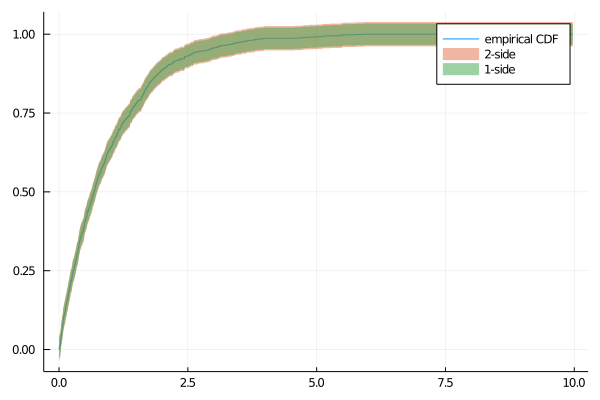

In [5]:
using Distributions, Plots, Roots

n = 1000
observations = sort(rand(Exponential(1), n));

ϵ = find_zero(ϵ -> 2exp(-2n*ϵ^2) - 0.1, 0.001)
e = find_zero(ϵ -> exp(-2n*ϵ^2) - 0.1, 0.001)
plot(observations, (1:n)/n, seriestype = :steppre, label = "empirical CDF")
plot!(observations, (1:n)/n .+ ϵ, fillrange = (1:n)/n .-ϵ, fillopacity = 0.5, linewidth = 0, seriestype = :steppre, label = "2-side")
plot!(observations, (1:n)/n .+ e, fillrange = (1:n)/n .-e, fillopacity = 0.5, linewidth = 0, seriestype = :steppre, label = "1-side")

In [11]:
function inband(error)
  xs = sort(rand(Exponential(1),n))
  all(@. 1 - exp(-xs) - error < (1:n)/n < 1 - exp(-xs) + error)
end
println("one-side: ", mean(inband(e) for _ in 1:10^6))
println("two-side: ", mean(inband(ϵ) for _ in 1:10^6))

one-side: 0.8164
two-side: 0.910107


One-side DKW is tighter than the two-side DKW.

## Problem 4

A manufacturer wants to introduce a new patch for infusing a particular hormone into the bloodstream. For FDA approval purposes, they need to demonstrate *bioequivalence*, meaning that the new treatment isn't statistically different from the old one. Each subject in the study receives three treatments placebo, old patch, and new patch. The resulting measurements of the concentration of the hormone in the bloodstream are as follows: 

$$\begin{array}{rrr}
\text{placebo} & \text{old} & \text{new} \\ \hline
9243 & 17649 & 16449 \\
9671 & 12013 & 14614 \\
11792 & 19979 & 17274 \\
13357 & 21816 & 23798 \\
9055 & 13850 & 12560 \\
6290 & 9806 & 10157 \\
12412 & 17208 & 16570 \\
18806 & 29044 & 26325
\end{array}$$

Here's a plot of the old and new treatment data: 

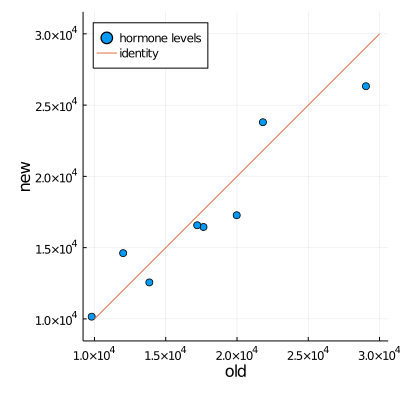

In [6]:
placebo = [9243, 9671, 11792, 13357, 9055, 6290, 12412, 18806]
old = [17649, 12013, 19979, 21816, 13850, 9806, 17208, 29044]
new = [16449, 14614, 17274, 23798, 12560, 10157, 16570, 26325]
scatter(old, new, xlabel = "old", ylabel="new", label="hormone levels", legend = :topleft, ratio = 1)
plot!([10_000, 30_000], x -> x, label = "identity", size = (400, 400))

The FDA requires that $\theta = |\mathbb{E}[Y]/ \mathbb{E}[Z]| < 0.2$ , where $Y$ is the difference between the old and new treatments, and $Z$ is the difference between the old treatment and placebo.

(a) Find the plug-in estimator $\hat\theta$ from these data. 

(b) Estimate the standard error of $\hat\theta$ by bootstrapping.

(c) Does this study demonstrate bioequivalence to a 95% confidence level?

(d) Do you get different results if you use bootstrap quantile estimates instead of estimating the standard error and using the normal approximation?

*Note: the data and broad strokes of this exercise are due to Efron and Tibshirani.*

In [7]:
function cal_θ((placebo, old ,new))
    Ys = old .- new
    Zs = old .- placebo
    θ_hat = abs(mean(Ys) / mean(Zs))
    return θ_hat
end
θ_hat = cal_θ((placebo, old, new))

0.07130609590256017

(solution a) The $\hat\theta$ is 0.0713

In [8]:
function sample_data()
    indices = sample([i for i in 1:length(placebo)], length(placebo))
    sample_placebo = [placebo[i] for i in indices]
    sample_old = [old[i] for i in indices]
    sample_new = [new[i] for i in indices]
    return sample_placebo, sample_old, sample_new
end
boot_estimates = [cal_θ(sample_data()) for _ in 1:10^6]
std_θ_hat = std(boot_estimates)
std_θ_hat

0.06639350791675168

(solution b) The bootstrapping standard error of $\hat\theta$ is 0.06640

In [7]:
println((θ_hat - 1.96 * std_θ_hat, θ_hat + 1.96 * std_θ_hat))

(-0.058829256407663025, 0.20144144821278337)


(solution c) The 95% confidence interval is (-0.0588, 0.201). 0.201 is bigger than 0.2, so this study does not demonstrate a bioequivalence.

In [8]:
quantile(boot_estimates, (0.025, 0.975))

(0.004772774434529985, 0.23948598130841123)

(solution d) I get a confidence interval of (0.00477, 0.239), approximately 0.05 to the right of the confidence interval in (c), which is different but pretty close. 0.239 is still bigger than 0.2, so bootstrapping confidence interval still does not show bioequivalence.

## Problem 5

We saw in class that a confidence interval based on bootstrapping can be narrower than is theoretically justified. This can be either because a standard error estimate is smaller than the actual standard deviation of the estimator...

In [90]:
observations = [9.687, 5.468, 10.882, 16.528, 6.695, 10.459, 14.688, 4.849, 10.697, 10.331, 10.751, 7.656, 12.328, 10.864, 11.499, 12.653, 3.824, 9.129, 13.516, 11.558, 11.551, 15.563, 5.887, 4.984, 14.599, 9.106, 6.617, 17.892, 13.424, 6.565, 15.03, 28.437, 8.846, 11.832, 7.768, 10.634, 7.442, 5.999, 5.317, 10.161, 9.796, 12.406, 5.0, 14.964, 9.458, 17.777, 6.725, 20.72, 2.85, 8.773, 7.215, 11.763, 10.957, 7.315, 11.13, 7.639, 15.01, 9.929, 6.089, 9.181, 7.708, 10.668, 6.81, 3.826, 9.983, 8.628, 17.895, 12.204, 12.935, 11.561, 13.523, 28.834, 16.089, 3.519, 11.164, 8.859, 3.84, 15.213, 4.147, 4.01, 9.578, 6.163, 9.197, 4.823, 12.381, 31.36, 4.531, 6.87, 20.009, 10.89, 13.163, 13.827, 9.219, 18.132, 22.761, 9.659, 6.965, 10.332, 9.938, 4.131];
ν = Chisq(10)
std(median(rand(ν, 100)) for _ in 1:100_000), std(median(rand(observations, 100)) for _ in 1:100_000)

(0.5340842612348244, 0.44834011102786164)

...or because intervals based on bootstrapped quantiles are narrower than the corresponding intervals obtained from the actual distribution of the estimator:

In [4]:
a = quantile([median(rand(ν, 100)) for _ in 1:100_000], [0.05, 0.95])
b = quantile([median(rand(observations, 100)) for _ in 1:100_000], [0.05, 0.95])
a, b

([8.494101765394463, 10.247497683498038], [9.3385, 10.807500000000001])

In this question, we want to figure out to what extent this conclusion is specific to this particular set of observations (the ones hard-coded as an array literal above)?

(a) Investigate numerically whether the standard error estimate obtained from the bootstrap tends on average to be larger or smaller than the actual standard error value `0.535`.

In other words, repeat the experiment we did above many times, but generate the *original* 100 observations from $\nu$ rather than using the given ones. Figure out the boostrapped standard deviation for each such repetition. Is it less than the correct value `0.535` approximately half the time, or significantly more/less than that?

In [143]:
using Random
Random.seed!(42)
comp = []
n = 1000
obs = rand(ν, 100)
for i in 1:n
    stderror = std(median(sample(obs, 100)) for _ in 1:1000)
    push!(comp, stderror > 0.535)
end

In [144]:
false_num = sum([1 for i in comp if !i])
true_num = sum([1 for i in comp if i])
println("Less times: ", false_num)
println("more times: ", true_num)

Less times: 1000
more times: 0


(solution a) The boostrapped standard deviation is significantly smaller than 0.535.

(b) Giving a confidence interval which is narrower than the one we would give if we knew the actual standard error of the estimator in question is not necessarily as bad as it seems. The reason is that the bootstrap-calculated standard error is itself random (in the sense that it depends on the observations $X_1, \ldots, X_n)$, and so the diminished probability of the confidence interval trapping the true value of the statistical functional when the bootstrapped standard error works out smaller than the true standard error can be compensated by an increased such probability when the estimated standard error is larger than its true value.

Explore that idea in the context of this particular example. Repeat the following experiment many times: 
1. Sample 100 independent observations from $\nu$. 
2. Produce a 95% confidence interval as $\hat\theta \pm 1.96 \hat{\mathrm{se}}(\hat\theta)$ where $\hat\theta$ is the sample median and $\hat{\mathrm{se}}$ denotes a bootstrap-estimated standard error.
3. Determine whether the estimated confidence interval traps the true value of the statistical functional (which is the median of $\nu$, computable as `quantile(ν, 0.5)`). 

In [158]:
function simulate()
    data = rand(ν, 100)
    mu_hat = median(data)
    se_hat = std(median(sample(data,100)) for _ in 1:10000)
    ci = (mu_hat - 1.96 * se_hat, mu_hat + 1.96 * se_hat)
    mu = quantile(ν, 0.5)
    if ci[1] < mu && mu < ci[2]
        return 1
    else
        return 0
    end
end
mean([simulate() for _ in 1:10000])

0.9407

(solution b) The actual $\theta$ in inside the confidence interval 0.9407 of the time. Therefore, we can conclude that the confidence interval does not cover the true value of the statistical functional as required by 0.05 significance level. 